# Variable transformers : PowerTransformer

The PowerTransformer() applies power or exponential transformations to
numerical variables.

The PowerTransformer() works only with numerical variables.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.transformation import PowerTransformer

In [3]:
# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


In [4]:
# Initialize Transformers with exponent 1/2
# this is equivalent to square root
# we will transform only 2 variables

et_transformer = PowerTransformer(variables=['LotArea', 'GrLivArea'], exp=0.5)

et_transformer.fit(X_train)

PowerTransformer(variables=['LotArea', 'GrLivArea'])

In [5]:
# transform variables

train_t = et_transformer.transform(X_train)
test_t = et_transformer.transform(X_test)

Text(0.5, 0, 'GrLivArea')

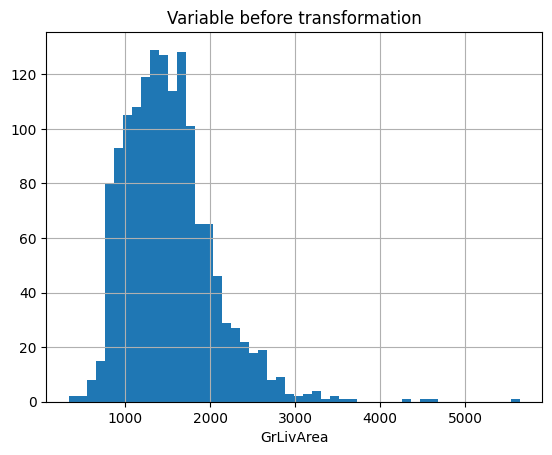

In [6]:
# variable before transformation
X_train['GrLivArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'GrLivArea')

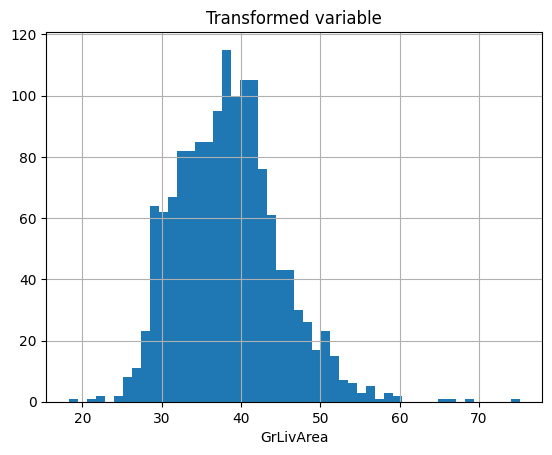

In [7]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)
plt.title('Transformed variable')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'LotArea')

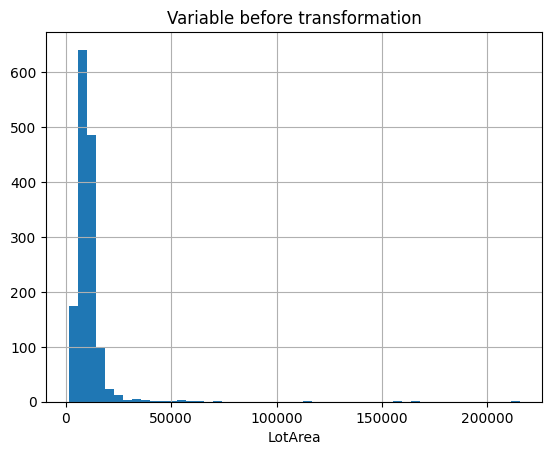

In [8]:
# tvariable before transformation
X_train['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

Text(0.5, 0, 'LotArea')

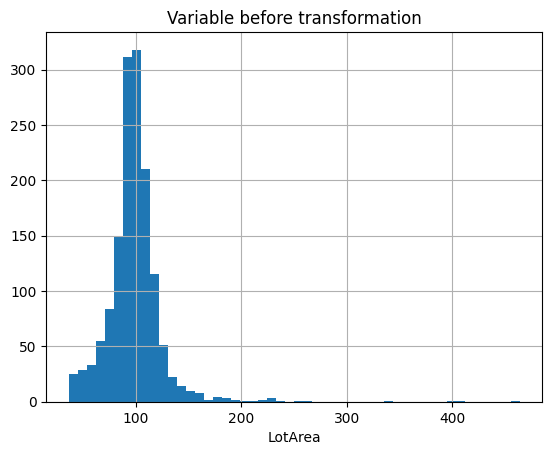

In [9]:
# transformed variable
train_t['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

In [10]:
# return variables to original representation

train_orig = et_transformer.inverse_transform(train_t)
test_orig = et_transformer.inverse_transform(test_t)

<Axes: >

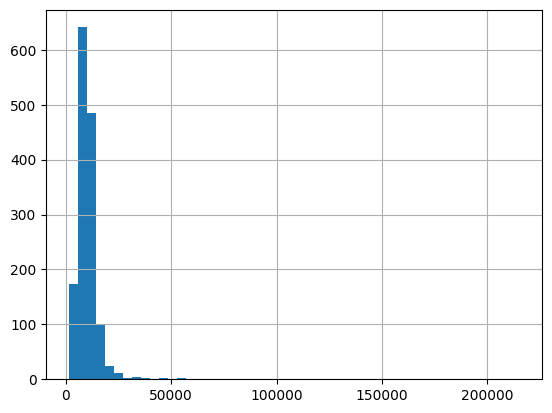

In [11]:
# inverse transformed variable distribution

train_orig['LotArea'].hist(bins=50)

<Axes: >

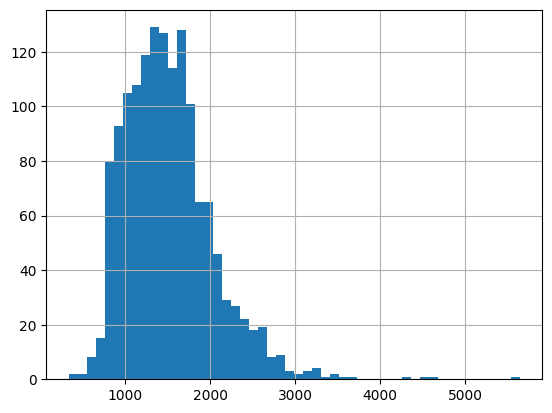

In [12]:
# inverse transformed variable distribution

train_orig['GrLivArea'].hist(bins=50)

## Automatically select numerical variables

To use the PowerTransformer we need to ensure that numerical values don't have missing data.

In [13]:
# remove missing data 

arbitrary_imputer = ArbitraryNumberImputer()

arbitrary_imputer.fit(X_train)

# impute variables
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [14]:
# initialize transformer with exp as 2

et = PowerTransformer(exp=2, variables=None)

et.fit(train_t)

PowerTransformer(exp=2)

In [15]:
# variables to trasnform
et.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

<Axes: >

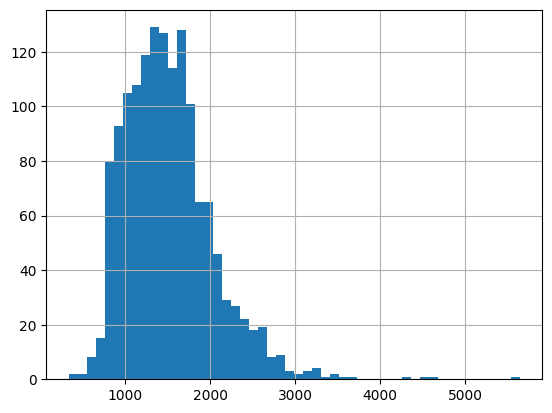

In [16]:
# before transformation

train_t['GrLivArea'].hist(bins=50)

In [17]:
# transform variables

train_t = et.transform(train_t)
test_t = et.transform(test_t)

<Axes: >

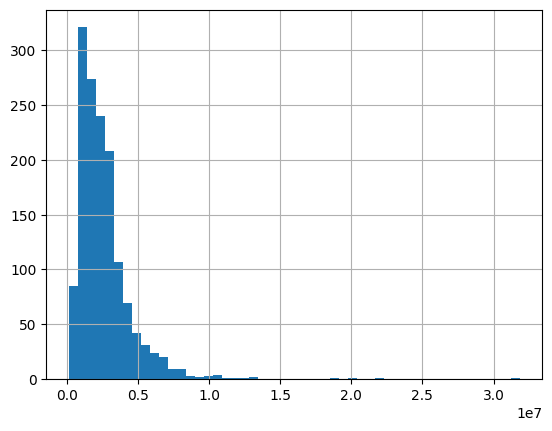

In [18]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

In [19]:
# return variables to original representation

train_orig = et_transformer.inverse_transform(train_t)
test_orig = et_transformer.inverse_transform(test_t)

<Axes: >

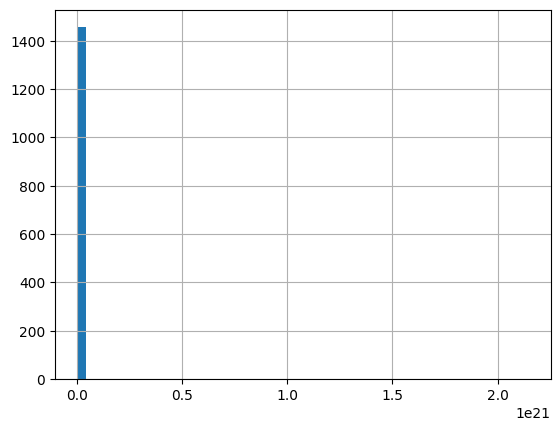

In [20]:
# inverse transformed variable distribution

train_orig['LotArea'].hist(bins=50)

<Axes: >

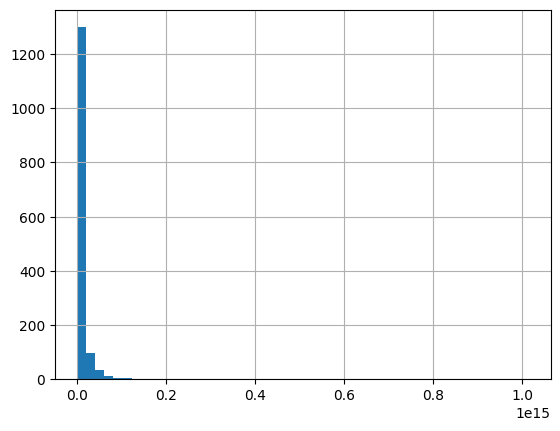

In [21]:
# inverse transformed variable distribution

train_orig['GrLivArea'].hist(bins=50)